In [1]:
from sys import argv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.special import factorial
from scipy.stats import poisson
import seaborn as sns
from scipy.special import factorial, gammaln

In [2]:
data = np.transpose(np.loadtxt('data/simple/calibracion_1ms.dat', delimiter=' '))
data2 = np.transpose(np.loadtxt('data/simple/calibracion_2ms.dat', delimiter=' '))
data3 = np.transpose(np.loadtxt('data/simple/calibracion_5ms.dat', delimiter=' '))

In [3]:
def fit_function(k, lamb):
    '''poisson function, parameter lamb is the fit parameter'''
    return  poisson.pmf(k, lamb)

def poisson_(k, lamb,a,offy,offx,b):
    """poisson pdf, parameter lamb is the fit parameter"""
    return a*( (np.exp(-lamb) * lamb**(b*k+offx)) /factorial(b*k+offx) )+offy 

def poisson_approx(k, lamb,a,offy,offx,b):
    """poisson pdf, parameter lamb is the fit parameter"""
    return  a*(np.exp( (b*k+offx)*np.log(lamb)-lamb - gammaln *((b*k+offx) + 1)))+offy


No handles with labels found to put in legend.


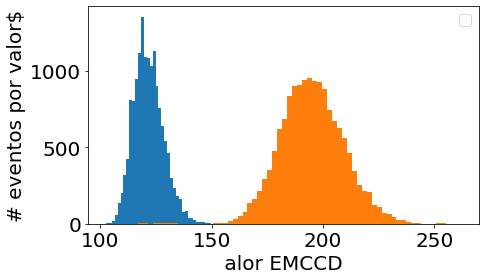

In [229]:
%matplotlib inline
plt.figure(figsize=(7,4))
entries2a, bin_edges2a, patches2a = plt.hist(data2[0],bins=int(max(data2[0])/4))
entries2b, bin_edges2b, patches2b = plt.hist(data2[1],bins=int(max(data2[1])/4))
plt.ylabel(r'# eventos por valor$',fontsize=20)
plt.xlabel(r' alor EMCCD ',fontsize=20)
plt.tick_params(axis="x", labelsize=20)
plt.tick_params(axis="y", labelsize=20)
#plt.xlim([0,10])
#plt.ylim([0,0.32])
plt.legend(fontsize=15)
plt.show()


<ipython-input-232-0bdc40247dd7>:7: RuntimeWarning: overflow encountered in exp
  return a*( (np.exp(-lamb) * lamb**(b*k+offx)) /factorial(b*k+offx) )+offy
<ipython-input-232-0bdc40247dd7>:7: RuntimeWarning: invalid value encountered in power
  return a*( (np.exp(-lamb) * lamb**(b*k+offx)) /factorial(b*k+offx) )+offy
<ipython-input-232-0bdc40247dd7>:7: RuntimeWarning: divide by zero encountered in true_divide
  return a*( (np.exp(-lamb) * lamb**(b*k+offx)) /factorial(b*k+offx) )+offy


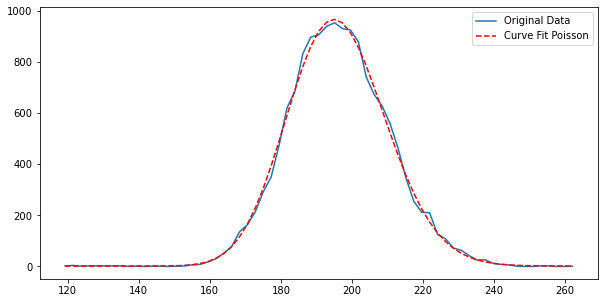

In [245]:
%matplotlib inline
x = np.delete(bin_edges2b,0,0)
y = entries2b

param, param_cov = curve_fit(poisson_,x,y, p0=[100,20000,230,0.01,0.5])
#param2, param_cov2 = curve_fit(poisson_approx,x,y, p0=[10,200,4,0.01,0.5])


#print("Covariance of coefficients:") 
#print(param_cov) 
#print(f'lambda: {param[0]}, {param2[0]}')
#print(f'a: {param[1]}, {param2[1]}')
#print(f'offy: {param[2]}, {param2[2]}')
#print(f'offx: {param[3]}, {param2[3]}')
#print(f'b: {param[4]}, {param2[4]}')


%matplotlib inline
plt.figure(figsize = (10,5))
#plt.plot(x,poisson_(x,90,21000,100))
plt.plot(x,y,label='Original Data')
plt.plot(x,poisson_(x,param[0],param[1],param[2],param[3],param[4]), label =f"Curve Fit Poisson",ls='dashed',color='red') 
#plt.plot(x,poisson_approx(x,param2[0],param2[1],param2[2],param2[3],param2[4]), label =f"Curve Fit Aprox Poisson",ls='dashed',color='green') 
plt.legend()

In [238]:
#poisson_approx(x,param[0],param[1],param[2],param[3],param[4])
type(np.array(x))

numpy.ndarray

### Veo la data RabiOsc

In [4]:
data4 = np.transpose(np.loadtxt('data/simple/RabiOsc_SBC_carrier_tobs=2ms.dat', delimiter=' '))

No handles with labels found to put in legend.


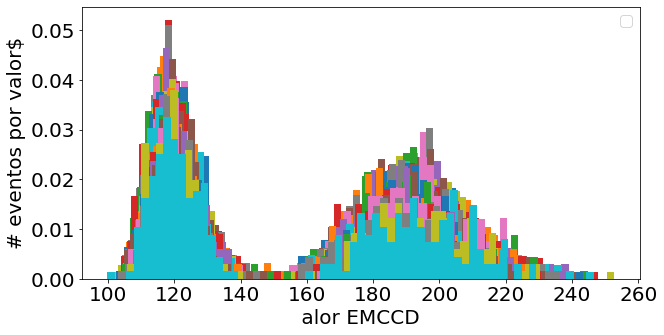

In [5]:
%matplotlib inline
plt.figure(figsize=(10,5))
ent=[]
bed=[]
for i in range(len(data4)):
    entries, bin_edges, patches = plt.hist(data4[i],bins=int(max(data4[i])/4),density=True)
    ent.append(entries)
    bed.append(bin_edges)
#entries1, bin_edges1, patches1 = plt.hist(data4[11],bins=int(max(data4[11])/4),density=True)
plt.ylabel(r'# eventos por valor$',fontsize=20)
plt.xlabel(r' alor EMCCD ',fontsize=20)
plt.tick_params(axis="x", labelsize=20)
plt.tick_params(axis="y", labelsize=20)
#plt.xlim([0,10])
#plt.ylim([0,0.32])
plt.legend(fontsize=15)
plt.show()

In [6]:
import matplotlib
import imageio
import matplotlib.pyplot as plt
from scipy import ndimage
from scipy import signal

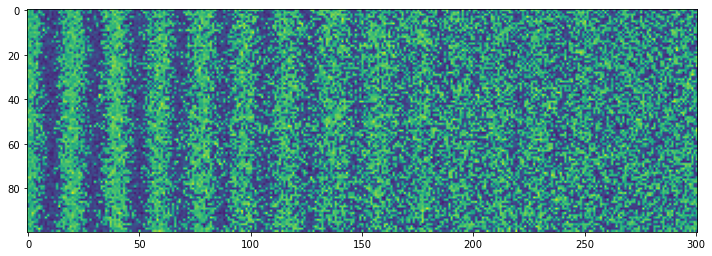

In [7]:
%matplotlib inline
from matplotlib.colors import LogNorm
plt.figure(figsize = (10, 7))
plt.imshow(data4,norm=LogNorm())
plt.tight_layout()

In [20]:
type(data4)


numpy.ndarray

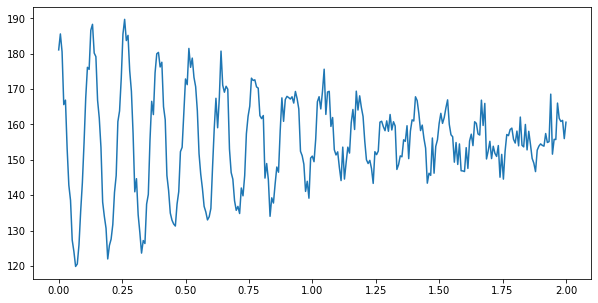

In [17]:
t = np.linspace(0,2,301)
plt.figure(figsize=(10,5))

data_mean = []
for col in np.transpose(data4):
    data_mean.append(np.mean(col))
plt.plot(t,data_mean)

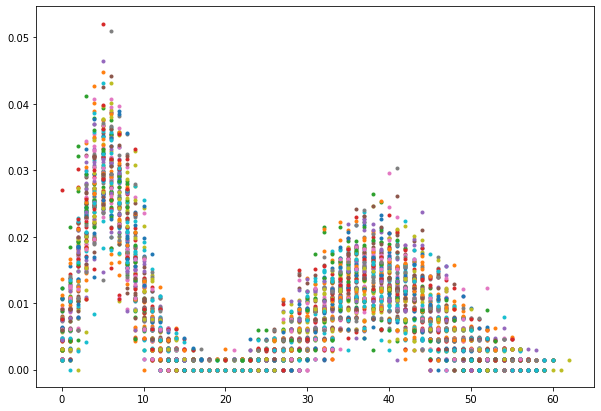

In [98]:
%matplotlib inline
plt.figure(figsize = (10, 7))
entl=[]
bedl=[]
for i in range(len(ent)):
    entl.append(ent[i].tolist())
    bedl.append(bed[i].tolist())
    plt.plot(ent[i],'.')

In [99]:
# Esto lo hice para que todas las sublistas tengan la misma cantidad de elemntos, y asi los puedo plotear 
# como una sola figura
nums1=[]
for i in range(len(entl)):
    f=len(entl[i])
    if f<63:
        for j in range(63-f):
            entl[i].append(0.0)
    nums1.append(len(entl[i]))

nums2=[]
for i in range(len(bedl)):
    f=len(bedl[i])
    if f<64:
        for j in range(64-f):
            bedl[i].append(0.0)
    nums2.append(len(bedl[i]))

### A esto falta ajustarle el eje x pero ya se ve el comportamiento

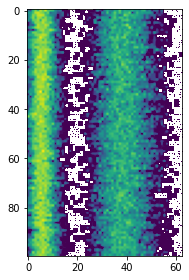

In [100]:
%matplotlib inline
from matplotlib.colors import LogNorm
plt.imshow(entl,norm=LogNorm())
plt.tight_layout()

### Data de una

In [101]:
data4tot=[]
temp=[]
for i in range(len(data4)):
    for j in range(len(data4[i])):
        data4tot.append(data4[i][j])
        temp.append(j)

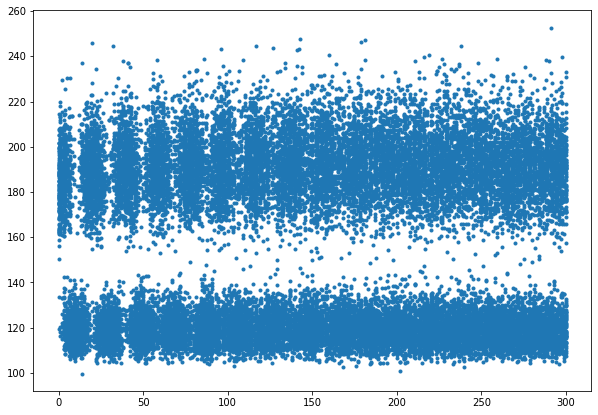

In [102]:
%matplotlib inline
plt.figure(figsize = (10, 7))
plt.plot(temp,data4tot,'.')